## 데이터셋 확인
- <https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

# 모델 만들기
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


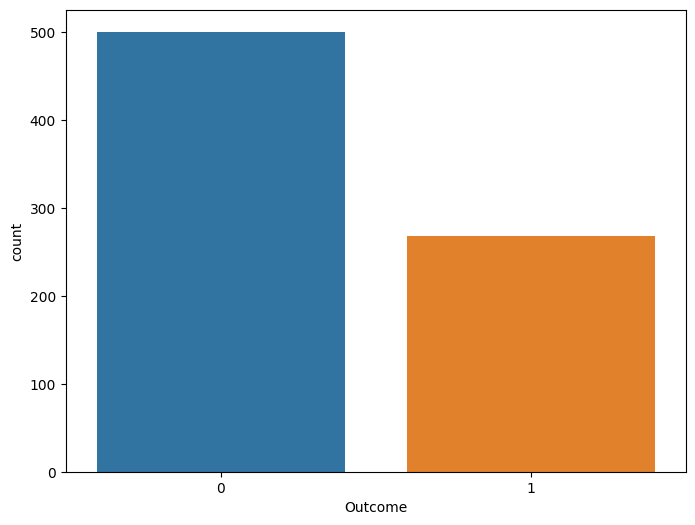

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome',data=diabetes)
plt.show()

In [5]:
X_data = diabetes.drop(['Outcome'], axis=1)
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y_data = diabetes['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.001, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(767, 8) (1, 8)
(767,) (1,)


In [51]:
def impute_zero(data,col):
  df=data.loc[data[col] !=0 , col]
  avg=np.sum(df)/len(df)
  k=len(data.loc[data[col]==0, col])
  data.loc[data[col] ==0, col] = avg
  print('%s : fixed %d, mean: %.3f' %(col,k,avg))

cols = X_train.columns[X_train.isnull().any()].tolist()
for col in cols:
  impute_zero(X_train, col)

In [52]:
(X_train[cols] ==0).sum(axis=0)

Series([], dtype: float64)

In [53]:
for col in cols:
  impute_zero(X_test, col)

In [54]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[-0.54687397 -0.27921921  0.30385279  0.719923   -0.69160552  0.47058862
  -0.97768283 -1.04025689]
 [-0.54687397 -0.40436815 -0.26457426 -1.28686747 -0.69160552 -0.15093697
  -0.94750099 -1.04025689]
 [ 1.23423997 -0.43565539  0.56222873 -1.28686747 -0.69160552 -0.9373571
   1.15919094  0.06566074]
 [ 0.93738765  0.47167446  1.07898059 -1.28686747 -0.69160552 -0.26509473
  -0.79055546  1.42679014]
 [ 0.64053533 -0.56080434  0.14882723  0.719923    0.95805521  0.72427253
  -0.44648257  1.85214307]]


In [55]:
# 넘파이 배열로 타입 변경- 이상치 확인

y_train = y_train.values
y_test=y_test.values

print(type(y_train), type(y_test))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [76]:

def build_improved_model():
    model = keras.Sequential()
    model.add(layers.Dense(16, input_dim=8, activation='relu'))  # 추가 은닉층
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Adam 최적화 알고리즘 사용
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [77]:
model = build_improved_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                144       
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [79]:
history = model.fit(X_train_s, y_train, epochs=500, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/500
39/39 [==============================] - 1s 7ms/step - loss: 0.6355 - acc: 0.6607 - val_loss: 0.6688 - val_acc: 0.6169
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6026 - acc: 0.6623 - val_loss: 0.6441 - val_acc: 0.6234
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5769 - acc: 0.6835 - val_loss: 0.6232 - val_acc: 0.6558
Epoch 4/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5560 - acc: 0.7031 - val_loss: 0.6059 - val_acc: 0.6883
Epoch 5/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5377 - acc: 0.7145 - val_loss: 0.5917 - val_acc: 0.7143
Epoch 6/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5242 - acc: 0.7194 - val_loss: 0.5817 - val_acc: 0.7273
Epoch 7/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5136 - acc: 0.7325 - val_loss: 0.5715 - val_acc: 0.7338
Epoch 8/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5036 - a

In [69]:
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()

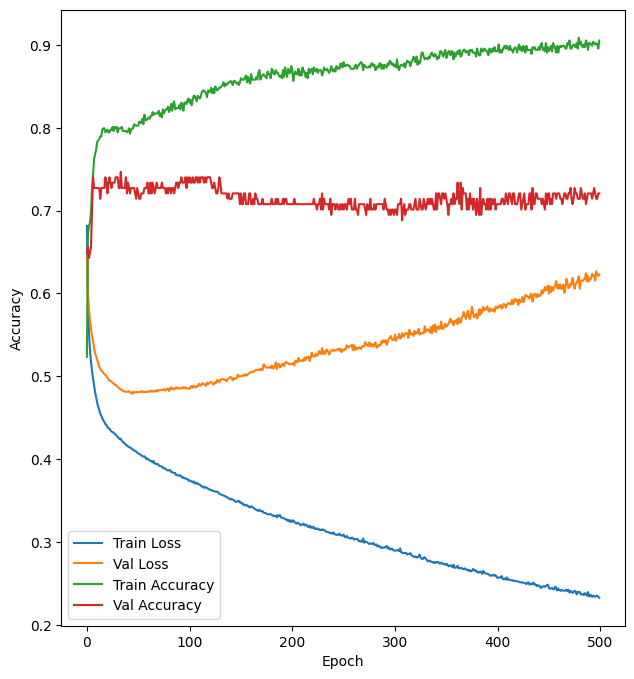

In [70]:
plot_history(history)

In [71]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

  plt.show()

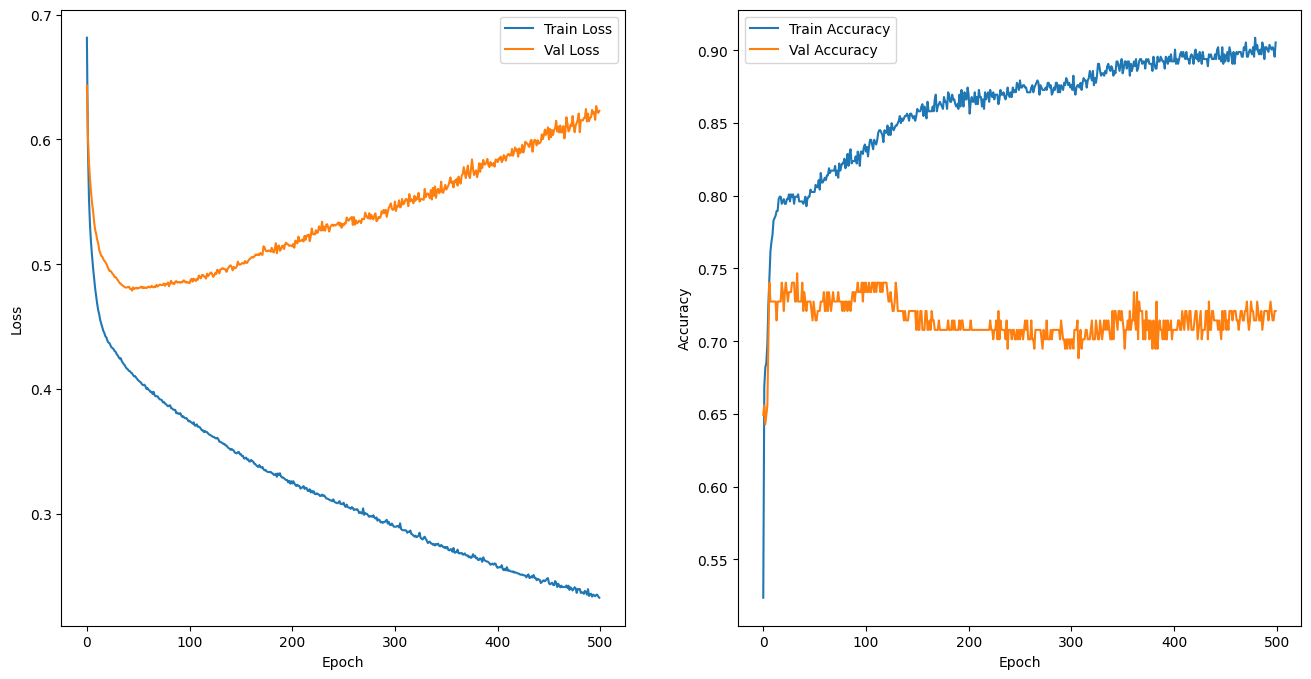

In [72]:
plot_history(history)